<a href="https://colab.research.google.com/github/koysean/plotting_workshop/blob/main/Plotting_workshop_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Course 2021
Authored by Jaron Ma and Sean Koyama
Thi is a Google Colab Notebook, which is similar to a Jupyter Notebook in that it combines coding blocks with text/image annotations. It runs Python code on Google's server's and feeds the output to your browser.

### Basic Plotting
As a brief refresher, numpy and matplotlib are designed to imitate MATLAB's advantages in creating, manipulating, and plotting matrices of data, which are sometimes considered vectors/arrays/tables. If you've used these packages before, the script below should look pretty familiar:

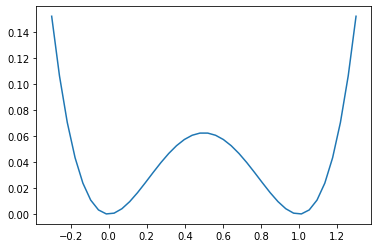

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.3,1.3,40)
y = x**2 * (1-x)**2
plt.plot(x,y)

The np.plot command expects as a bare minimum an input that can be interpreted as a list of data. If there are two inputs of equal size, the first is interpreted as the x-coordinates of the data, and the second is interpreted as the y-cooridnates of the data, with the datapoints connected by a line in the order that they appear.

###Beyond the Default

The default output from np.plot is not bad on its own: The blue color of the plot used is pleasant, and the axis limits are scaled to the data. This makes it easy to get in the habit of falling back on the defaults, but our first tip for plotting is to be aware of how easy it is not to use the default settings. An equivalent command as above would have been:

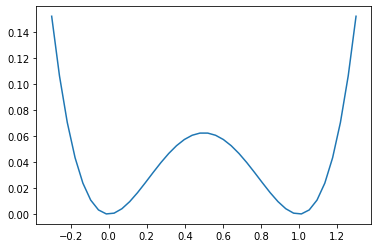

In [ ]:
plt.plot(x,y,linestyle='-',color='#1f77b4',linewidth=1.5,marker='')

Here, we are using **name-value pairs**. The properies named linestyle, color, etc., can be listed followed by the values you want them to take on. The values given above correspond to the default values chosen by MATLAB (as of R2021b), which makes it clearer how to change the plot's apperance. For example, to mix things up:

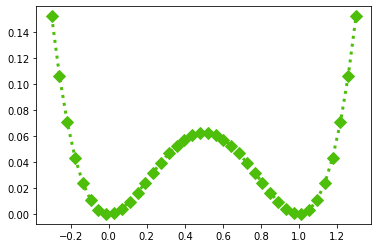

In [ ]:
plt.plot(x,y,linestyle=':',color=[0.3, 0.7470 ,0.0410], linewidth=3, marker='D',markersize=8)

###Getting and Setting
The next tip we have will further help customize your plots: consider taking the time to retain your object handles so that you can **get and set** properties in the code itself.


    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([-0.3       , -0.25897436, -0.21794872, -0....
    drawstyle or ds = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    in_layout = True
    label = _line0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[-3.00000000e-01,  1.52100000e-01],   ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = None
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    s

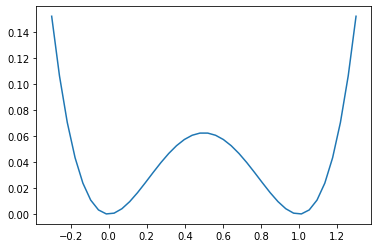

In [ ]:
fig_1 = plt.figure(); 
ax1_1 = fig_1.add_subplot()
plot1 = ax1_1.plot(x,y)
plt.setp(plot1,)
plt.getp(plot1)

In [ ]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit

First import data from github

In [ ]:
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/c_e_v.csv
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/si_e_v.csv
!wget https://raw.githubusercontent.com/koysean/plotting_workshop/main/ge_e_v.csv

Then parse the CSV files into numpy arrays. With this code the data will be arranged into 2 x *n* arrays, with the first row containing volumes (Å<sup>3</sup>) and the second row containing energy (eV).

*Note: raw energy values should not be directly compared as they do not share a well-defined reference point*

In [ ]:
c_e_v = [[], []]
si_e_v = [[], []]
ge_e_v = [[], []]

with open('c_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    c_e_v[0].append(float(split_line[0]))
    c_e_v[1].append(float(split_line[1]))
  c_e_v = np.asarray(c_e_v)

with open('si_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    si_e_v[0].append(float(split_line[0]))
    si_e_v[1].append(float(split_line[1]))
  si_e_v = np.asarray(si_e_v)

with open('ge_e_v.csv', 'r') as file:
  for line in file.readlines():
    split_line = line.split(',')
    ge_e_v[0].append(float(split_line[0]))
    ge_e_v[1].append(float(split_line[1]))
  
  ge_e_v = np.asarray(ge_e_v)

We can find the equilibrium volume and energy by looking at where the energy is at a minimum.

In [ ]:
min_volumes = {
    'c':  c_e_v[0][np.argmin(c_e_v[1])],
    'si':  si_e_v[0][np.argmin(si_e_v[1])],
    'ge':  ge_e_v[0][np.argmin(ge_e_v[1])]
}

min_energies = {
    'c':  np.min(c_e_v[1]),
    'si':  np.min(si_e_v[1]),
    'ge':  np.min(ge_e_v[1])
}

print('(Roughly) Equilibrium values of (V, E):')
print('C:\t{:.3f}, {:.3f}'.format(min_volumes['c'], min_energies['c']))
print('Si:\t{:.3f}, {:.3f}'.format(min_volumes['si'], min_energies['si']))
print('Ge:\t{:.3f}, {:.3f}'.format(min_volumes['ge'], min_energies['ge']))

With this data, we can plot the energy-volume curve!

In [ ]:
fig, ax = plt.subplots()

sc_c = ax.scatter(c_e_v[0], c_e_v[1])
sc_si = ax.scatter(si_e_v[0], si_e_v[1])
sc_ge = ax.scatter(ge_e_v[0], ge_e_v[1])

ax.legend([sc_c, sc_si, sc_ge], ['C', 'Si', 'Ge'])

We can try a rudimentary second-order polynomial fit to the data, excluding the points where the curves are obviously non-parabolic.

In [ ]:
poly_c = poly.polyfit(c_e_v[0][4:16], c_e_v[1][4:16], 2)
poly_si = poly.polyfit(si_e_v[0][4:16], si_e_v[1][4:16], 2)
poly_ge = poly.polyfit(ge_e_v[0][4:16], ge_e_v[1][4:16], 2)

We can plot these fits along with the real data.

In [ ]:
fig, ax = plt.subplots()

sc_c = ax.scatter(c_e_v[0], c_e_v[1])
ax.plot(c_e_v[0], poly.polyval(c_e_v[0], poly_c))

sc_si = ax.scatter(si_e_v[0], si_e_v[1])
ax.plot(si_e_v[0], poly.polyval(si_e_v[0], poly_si))

sc_ge = ax.scatter(ge_e_v[0], ge_e_v[1])
ax.plot(ge_e_v[0], poly.polyval(ge_e_v[0], poly_ge))

ax.legend([sc_c, sc_si, sc_ge], ['C', 'Si', 'Ge'])

Not too good. We can do better and also extract physical parameters from this data by fitting to an equation of state. In this example, we fit to the Birch–Murnaghan equation of state:

$E(V) = E_0 + \dfrac{9V_0B_0}{16} \left\{ \left[   \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}} - 1 \right]^3 B_0'  + \left[  \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}}-1 \right]^2 \left[ 6 - 4 \left(  \dfrac{V_0}{V}\right)^{\frac{2}{3}}    \right]    \right\}$

In [ ]:
def bm_eos(v, v0, b0, bp0, e0):
  ''' Birch-Murnaghan EOS. 
  Arguments:
    v: volume input
    v0: equilibrium volume
    b0: bulk modulus at equilibrium
    bp0: derivative of bulk modulus wrt pressure at equilibrium
    e0: equilibrium energy
  
  Outputs:
     Internal energy of the system, E(V)
  '''

  gamma = (v0/v)**(2/3)

  return e0 + 9/16 * v0 * b0 * (
      (gamma - 1)**3 * bp0
      + (gamma - 1)**2 * (6 - 4*gamma)
  )

Using scipy's optimize library, we can fit our data to the B-M equation of state. The fit coefficients are given in the order of the parameters as defined in the function above, i.e. (v0, b0, bp0, e0):

In [ ]:
fit_c, conv_c = curve_fit(bm_eos, c_e_v[0], c_e_v[1], p0 = [min_volumes['c'], 2, 2, -10])

fit_si, conv_si = curve_fit(bm_eos, si_e_v[0], si_e_v[1], p0 = [min_volumes['si'], 2, 2, -10])

fit_ge, conv_ge = curve_fit(bm_eos, ge_e_v[0], ge_e_v[1], p0 = [min_volumes['ge'], 2, 2, -10])

print('Fit parameters for C:', fit_c)

Fit parameters for C: [ 11.31433243   2.69028099   3.91315318 -18.64456242]


Again, plotting against the real data:

In [ ]:
fig, ax = plt.subplots()

sc_c = ax.scatter(c_e_v[0], c_e_v[1])
ax.plot(c_e_v[0], bm_eos(c_e_v[0], *fit_c))

sc_si = ax.scatter(si_e_v[0], si_e_v[1])
ax.plot(si_e_v[0], bm_eos(si_e_v[0], *fit_si))

sc_ge = ax.scatter(ge_e_v[0], ge_e_v[1])
ax.plot(ge_e_v[0], bm_eos(ge_e_v[0], *fit_ge))

ax.legend([sc_c, sc_si, sc_ge], ['C', 'Si', 'Ge'])

And it returns a pretty good fit!

So far we've just created the most basic plots we can with this data and the fits. See if you can make these plots any nicer! Think about what you can communicate with this data and then try to make a clear and `a e s t h e t i c` plot.

Remember, the data you have to work with for each material (C, Si, Ge) is:

*   Raw DFT energy-volume data
*   The Birch-Murnaghan equation of state and its fitted parameters, including bulk modulus
*   The quadratic fitting coefficients


---



Some questions to get you thinking about what or how to make a good plot from this data:

*   What are the quantities of interest?
*   What do the fits show that the raw data doesn't?
*   What do you want your audience to learn from your plot?
*   How can you minimize the amount of thinking required on behalf of your audience in interpreting your plot; in other words, how can you make your plot efficient?

Once you have a visualization, ask yourself those questions again to see if you can find further ways to improve your plot. Here are a few more questions you can ask yourself:

*   Is the feature or quantity you're trying to communicate the most obvious part of the plot?
*   Are the colors visually distinct? What about to someone with colorblindness (red-green colorblindness is the most common type)?
*   Does understanding your plot require frequent visual lookup (i.e. looking back and forth at the plot and a legend to make sense of the plot)?
